In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from numpy import random

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data_Science_Fields_Salary_Categorization.csv')
df.drop('Unnamed: 0',inplace = True,axis=1) #just a index
df

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50
...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,SE,FT,"12,253,703.00",US,US,M,100
603,2022,Data Engineer,SE,FT,"10,025,757.00",US,US,M,100
604,2022,Data Analyst,SE,FT,"10,264,466.00",US,US,M,0
605,2022,Data Analyst,SE,FT,"11,935,425.00",US,US,M,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Working_Year          607 non-null    int64 
 1   Designation           607 non-null    object
 2   Experience            607 non-null    object
 3   Employment_Status     607 non-null    object
 4   Salary_In_Rupees      607 non-null    object
 5   Employee_Location     607 non-null    object
 6   Company_Location      607 non-null    object
 7   Company_Size          607 non-null    object
 8   Remote_Working_Ratio  607 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 42.8+ KB


In [4]:
# converting Salary into int
df['Salary_In_Rupees'] = [i.split('.')[0].replace(',','') for i in df['Salary_In_Rupees']]
df['Salary_In_Rupees'] = df['Salary_In_Rupees'].astype(int)

# Numerical Variables

In [5]:
numerical_features = df.select_dtypes(exclude='O').columns
print(numerical_features)

df[numerical_features]

Index(['Working_Year', 'Salary_In_Rupees', 'Remote_Working_Ratio'], dtype='object')


,Working_Year,Salary_In_Rupees,Remote_Working_Ratio
0,2020,6352272,0
1,2020,20688070,0
2,2020,8674985,50
3,2020,1591390,0
4,2020,11935425,50
...,...,...,...
602,2022,12253703,100
603,2022,10025757,100
604,2022,10264466,0
605,2022,11935425,100


In [6]:
discrete_features = [features for features in numerical_features if len(df[features].unique())<25]
discrete_features

['Working_Year', 'Remote_Working_Ratio']

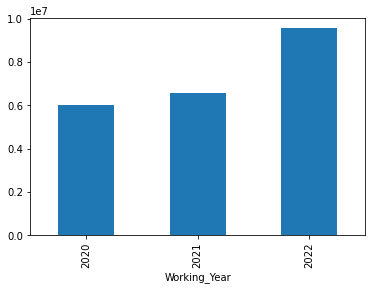

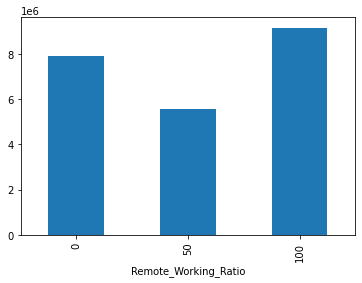

In [7]:
for features in discrete_features:
    df.groupby(features)['Salary_In_Rupees'].median().plot(kind='bar')
    plt.show()

## Observation

The people in 2022 got more salary as compared to 2020 and 2021 which is obvious because as the year increases salary also increases.

People who done 100% of work remotely has higher salary while people who were working partially remotely has lower salary compared with others

# Categorical Variables

In [8]:
categorical_features = df.select_dtypes(include='object').columns
print(categorical_features)

df[categorical_features]

Index(['Designation', 'Experience', 'Employment_Status', 'Employee_Location',
       'Company_Location', 'Company_Size'],
      dtype='object')


,Designation,Experience,Employment_Status,Employee_Location,Company_Location,Company_Size
0,Data Scientist,MI,FT,DE,DE,L
1,Machine Learning Scientist,SE,FT,JP,JP,S
2,Big Data Engineer,SE,FT,GB,GB,M
3,Product Data Analyst,MI,FT,HN,HN,S
4,Machine Learning Engineer,SE,FT,US,US,L
...,...,...,...,...,...,...
602,Data Engineer,SE,FT,US,US,M
603,Data Engineer,SE,FT,US,US,M
604,Data Analyst,SE,FT,US,US,M
605,Data Analyst,SE,FT,US,US,M


In [9]:
#finding how many unique categories does a category has
categories_count = {features:len(df[features].unique()) for features in categorical_features}
categories_count = dict(sorted(categories_count.items(), key = lambda ele: ele[1]))
categories_count

{'Company_Size': 3,
 'Experience': 4,
 'Employment_Status': 4,
 'Designation': 50,
 'Company_Location': 50,
 'Employee_Location': 57}

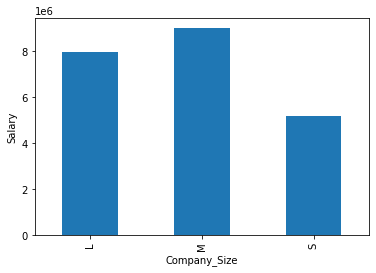

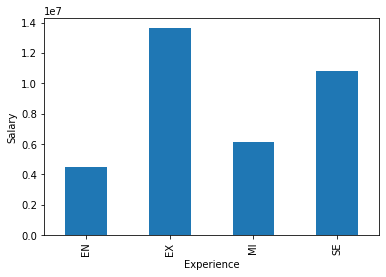

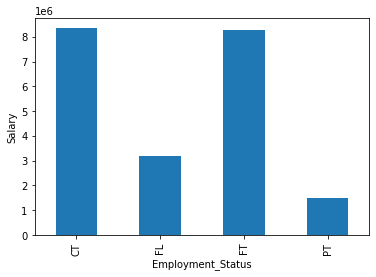

In [10]:
cols = ['Company_Size','Experience','Employment_Status']
for features in cols:
    df.groupby(features)['Salary_In_Rupees'].median().plot.bar()
    plt.xlabel(features)
    plt.ylabel('Salary')
    plt.show()

 # Observation 
1. Medium company size is giving more salary
2. Executive level / Director's salary is highest and entry level lowest
3. Contract basis and full time person's salary highest and part time lowest

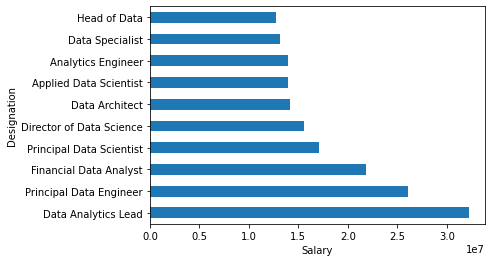

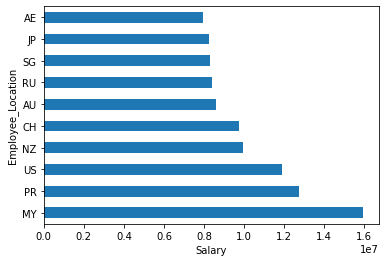

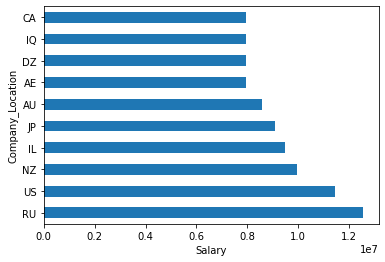

In [11]:
pd.options.display.float_format = '{:,.2f}'.format
for features in categorical_features:
    if features not in cols:
        df.groupby(features)['Salary_In_Rupees'].mean().nlargest(10).plot(kind='barh')
        plt.xlabel('Salary')
        plt.ylabel(features)
        plt.show()

# Observation
1. Data Analytics lead has the highest salary
2. Employees from MY has highest salary
3. Company which is located in RU has highest salary

# Feature Engineering

Creating new column from remote ratio

In [12]:
# making a new column and categorizing based on remote choice

conditions  = [ df['Remote_Working_Ratio'] == 0,df['Remote_Working_Ratio'] == 50,df['Remote_Working_Ratio'] == 100]
choices     = ['No','Partial','Full']
    
df["Remote_Working_group"] = np.select(conditions, choices, default=np.nan)


In [13]:
# # generating random numbers and categorizing them as Small, medium and large
# df['Company_Size_Value'] = 0
# for i,j in enumerate(df['Company_Size']):
#     if j == 'S':
#         df.iloc[i,10] = random.randint(1,50)
#     elif j == 'M':
#         df.iloc[i,10] = random.randint(50,249)
#     else:
#         df.iloc[i,10] = random.randint(250,10000)

In [14]:
# conditions  = [ df['Company_Size'] == 'L',df['Company_Size'] == 'M',df['Company_Size'] == 'S']
# choices     = [random.randint(250,10000),random.randint(50,249),random.randint(0,49)]
    
# df["Company_Size_Value"] = np.select(conditions, choices, default=np.nan)


In [15]:
# # categorizing company size
# def Company_size_group(size):
#     result = ''
#     if size<50.0:
#         result = 'S'
#     elif size>50.0 and size<250.0:
#         result = 'M'
#     else:
#         result = 'L'
#     return result

# df.drop('Company_Size',axis=1,inplace=True)
# df['Company_Size'] = df['Company_Size_Value'].apply(Company_size_group)

In [16]:
# Creating a new column location where 1 means employee location and company location are same.
df['Location'] = np.where(df['Employee_Location']==df['Company_Location'],1,0)
df

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Remote_Working_group,Location
0,2020,Data Scientist,MI,FT,6352272,DE,DE,L,0,No,1
1,2020,Machine Learning Scientist,SE,FT,20688070,JP,JP,S,0,No,1
2,2020,Big Data Engineer,SE,FT,8674985,GB,GB,M,50,Partial,1
3,2020,Product Data Analyst,MI,FT,1591390,HN,HN,S,0,No,1
4,2020,Machine Learning Engineer,SE,FT,11935425,US,US,L,50,Partial,1
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,SE,FT,12253703,US,US,M,100,Full,1
603,2022,Data Engineer,SE,FT,10025757,US,US,M,100,Full,1
604,2022,Data Analyst,SE,FT,10264466,US,US,M,0,No,1
605,2022,Data Analyst,SE,FT,11935425,US,US,M,100,Full,1


<AxesSubplot:xlabel='Location'>

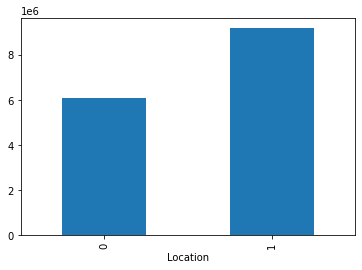

In [17]:
df.groupby('Location')['Salary_In_Rupees'].mean().plot.bar()

## We have more people who works in their city only

In [18]:
# Reassigning the variables
numerical_features = df.select_dtypes(exclude='O').columns
categorical_features = df.select_dtypes(include='O').columns
nominal_categorical_features = [features for features in categorical_features if features not in 'Company_Size']
ordinal_categorical_features = [features for features in categorical_features if features not in nominal_categorical_features]

# Nominal categorical

In [19]:
# # replacing categories with mean of categories wrt Salary - mean encoding
# for features in nominal_categorical_features:
#     categories_num = df.groupby(features)['Salary_In_Rupees'].mean().sort_values().to_dict()
#     df[features+'_Mean_Encoding'] = df[features].map(categories_num)
#     df.drop(features,axis=1,inplace=True)
    
# df
print(nominal_categorical_features)
categories_count

['Designation', 'Experience', 'Employment_Status', 'Employee_Location', 'Company_Location', 'Remote_Working_group']


{'Company_Size': 3,
 'Experience': 4,
 'Employment_Status': 4,
 'Designation': 50,
 'Company_Location': 50,
 'Employee_Location': 57}

In [20]:
# One hot encoding
for features in nominal_categorical_features:
    dummy = pd.get_dummies(df[features],drop_first=True)
    df = pd.concat([df,dummy],axis=1)
    df.drop(columns=[features],inplace=True)

# Ordinal Categorical

In [21]:
# # Target guided ordinal mean encoding

# for features in ordinal_categorical_features:
#     label = df.groupby([features])['Salary_In_Rupees'].mean().sort_values().index
#     label_two = {k:i for i,k in enumerate (label ,0)}
#     df[features+'_Ordinal_Encoding'] = df[features].map(label_two)
#     df.drop(features,axis=1,inplace=True)

ordinal_categorical_features

['Company_Size']

In [22]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
for features in ordinal_categorical_features: 
    label_encoder = LabelEncoder()
    df[features] = label_encoder.fit_transform(df[features])

In [23]:
df

,Working_Year,Salary_In_Rupees,Company_Size,Remote_Working_Ratio,Location,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Scientist,BI Data Analyst,...,RO,RU,SG,SI,TR,UA,US,VN,No,Partial
0,2020,6352272,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2020,20688070,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2020,8674985,1,50,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2020,1591390,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2020,11935425,0,50,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,12253703,1,100,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
603,2022,10025757,1,100,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
604,2022,10264466,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
605,2022,11935425,1,100,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
X = df.drop('Salary_In_Rupees',axis=1)
y = df['Salary_In_Rupees']

In [25]:
min_max = MinMaxScaler()
X_scaled = min_max.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=0)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.0132562646578162e+19
MSE: 1.9942845255723072e+39
RMSE: 4.4657412884898595e+19


In [28]:
# import pickle
# pickle.dump(model,open('model.pkl','wb'))